In [1]:
from flyins.models import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [3]:
obj_set = FlyIn.objects.filter(course__year=2018)

Histograma por día-hora ( 140 )


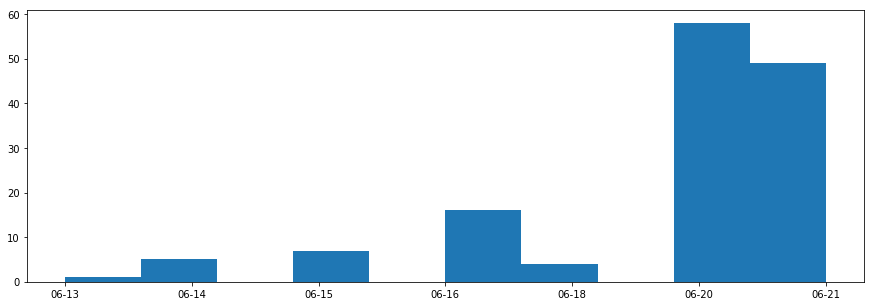

In [4]:
def filter_day_hour(pi):
    return pi.create_date.replace(second=0, microsecond=0, minute=0).strftime('%d-%H')

print("Histograma por día-hora (", obj_set.count(), ")")

timestamps = list(map(filter_day_hour, obj_set.all()))
timestamps = sorted(timestamps)
plt.hist(timestamps)
plt.show()

# Histograma por Cursos

Histograma por cursos ( 140 )


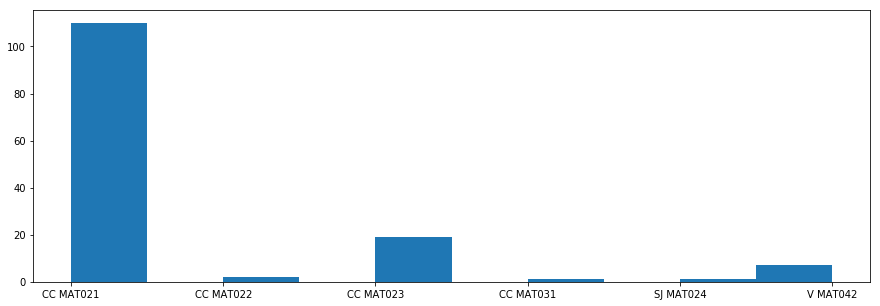

In [5]:
CAMPUS_CODES = {"Casa Central": "CC", "San Joaquín": "SJ", "Vitacura": "V"}

def filter_course_name(p):
    return "%s %s" % (CAMPUS_CODES[p.course.campus.name], p.course.name.replace(" ", "").replace("-", ""))

print("Histograma por cursos (", obj_set.count(), ")")

courses = sorted(list(map(filter_course_name, obj_set.all())))
plt.hist(courses)
plt.show()

# Detección de repetidos

Se detectan estudiantes que ingresaron dos o más veces la misma pre-inscripción.

In [6]:
from IPython.display import display, HTML

rols = {}

def compare_instance(obj1, obj2):
    df = pd.DataFrame()
    names = []
    equality = []
    obj1s = []
    obj2s = []
    for f in obj1._meta.get_fields():
        p1 = getattr(obj1, f.name)
        p2 = getattr(obj2, f.name)

        names.append(f.name)
        equality.append(p1 == p2)
        obj1s.append(p1)
        obj2s.append(p2)
    
    df['field'] = names
    df['equality'] = equality
    df['value1'] = obj1s
    df['value2'] = obj2s

    display(HTML(df.to_html()))


for p in obj_set.all():
    fmt = "%s:%s" % (p.rol, p.course.pk)
    if fmt in rols:
        g = rols[fmt]
        compare_instance(g, p)
    else:    
        rols[fmt] = p

,field,equality,value1,value2
0,id,False,1144,1151
1,course,True,MAT 021 - Casa Central 2018-1,MAT 021 - Casa Central 2018-1
2,software,True,Mathematica,Mathematica
3,first_name,True,Bruno,Bruno
4,last_names,True,Navarrete,Navarrete
5,rol,True,201821010-2,201821010-2
6,usm_priority,True,0,0
7,parallel,True,15,15
8,previous_experience,True,False,False
9,create_date,False,2018-03-06 16:56:07.773273+00:00,2018-03-06 18:31:28.777337+00:00


,field,equality,value1,value2
0,id,False,1221,1233
1,course,True,MAT 021 - Casa Central 2018-1,MAT 021 - Casa Central 2018-1
2,software,True,Mathematica,Mathematica
3,first_name,True,Sofía,Sofía
4,last_names,True,Tapia Quiroz,Tapia Quiroz
5,rol,True,201851007-6,201851007-6
6,usm_priority,True,664,664
7,parallel,True,8,8
8,previous_experience,True,False,False
9,create_date,False,2018-03-06 21:00:39.140217+00:00,2018-03-06 21:06:39.832867+00:00
